In [27]:
import pandas as pd
df = pd.read_csv('../../preprocessing/output_results/hotels_preprocessed_all.csv')
df

,name,location,price,date,stars,km_from_center,num_external_reviews,booking_user_ratings,avg_user_ratings,airport_taxi,travel_sustainable_level,has_free_cancelation,town_location,price_category,month
0,"The Pavilions Amsterdam, The Toren","Amsterdam City Center, Amsterdam",233.450157,2024-02-01,4,0.6,1044,5,8.900000,0,4,0,Amsterdam,High,February
1,Sonder Park House,"Oud Zuid, Amsterdam",144.615141,2024-02-01,4,1.7,3190,1,7.500000,0,0,1,Amsterdam,High,February
2,Hotel Jansen Amsterdam Bajeskwartier,"Oost, Amsterdam",85.679184,2024-02-01,0,4.2,1155,2,8.300000,0,3,1,Amsterdam,Medium,February
3,AmicitiA,"Amsterdam City Center, Amsterdam",30.061730,2024-02-01,0,1.2,1820,1,7.100000,0,0,1,Amsterdam,Low,February
4,Hotel Washington,"Oud Zuid, Amsterdam",50.102884,2024-02-01,2,2.1,2205,1,7.300000,0,0,0,Amsterdam,Low,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51287,Schöne 2 1/2 Zimmer Wohnung im Herzen von Dort...,"Dortmund City Centre, Dortmund",190.748835,2025-01-31,0,0.6,11,5,8.600000,0,0,0,Dortmund,High,January
51288,schlafgut24,Dortmund,119.254623,2025-01-31,0,10.9,16,4,9.600000,0,2,0,Dortmund,Medium,January
51289,3 Zimmer Wohnung in Dortmund,Dortmund,190.390958,2025-01-31,0,3.0,3,2,8.000000,0,0,0,Dortmund,High,January
51290,"Wohnung Nähe Uni,Stadion",Dortmund,84.768223,2025-01-31,0,5.0,0,0,7.789035,0,0,0,Dortmund,Medium,January


In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

/Users/nikolagilev/projects/uni_projects/uni_proj/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nikolagilev/projects/uni_projects/uni_proj/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nikolagilev/projects/uni_projects/uni_proj/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nikolagilev/projects/uni_projects/uni_proj

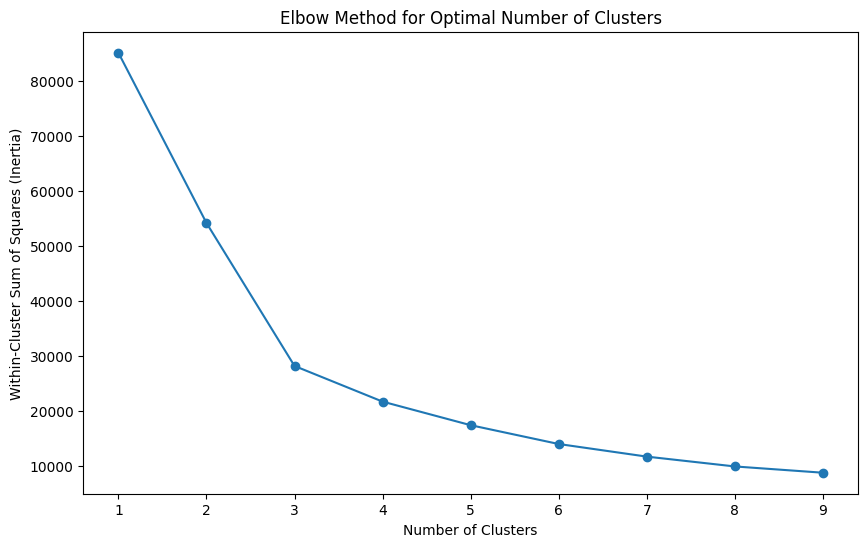

In [30]:
df = df[df['km_from_center'] < 20]

X_clustering = df[['price', 'km_from_center']]

scaler = StandardScaler()
X_clustering_scaled = scaler.fit_transform(X_clustering)

# the Elbow method
inertia = []
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_clustering_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()


From this we can conclude that the optimal number of clusters is 3 or 4 before significant loss apears!

/Users/nikolagilev/projects/uni_projects/uni_proj/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


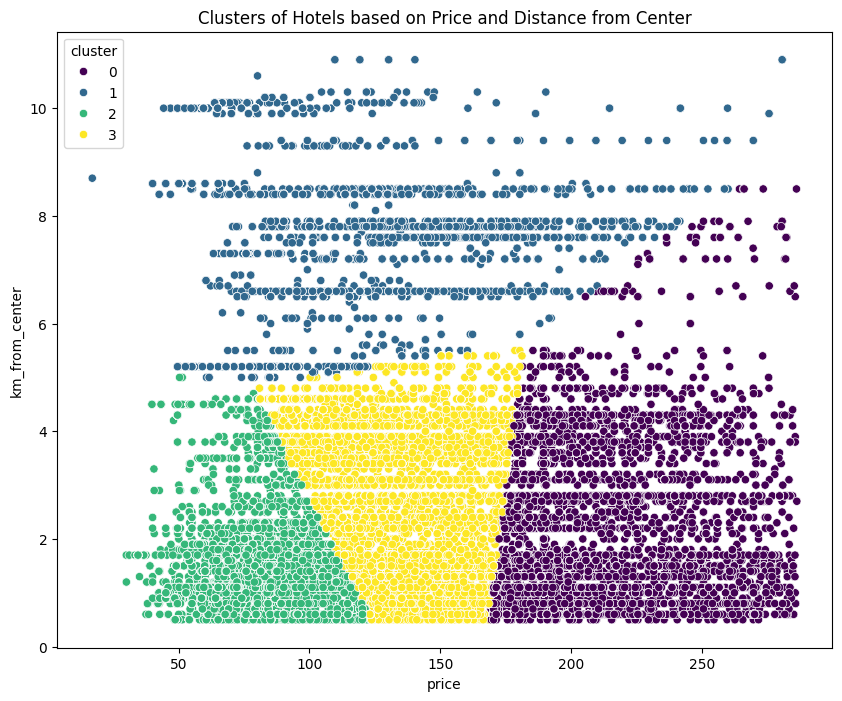

In [31]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_clustering_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='price', y='km_from_center', hue='cluster', data=df, palette='viridis')
plt.title('Clusters of Hotels based on Price and Distance from Center')
plt.show()